# Movie Recommendation System

## Recap of problem statement

How can data from a movie-based platform recommend other movies to users based on their preferences and activities on that platform? 

## Data Wrangling

## Load the libraries

In [2]:
import pandas as pd
import numpy as np
import math
import re
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from ast import literal_eval
import matplotlib
#reconfigure default settings
sns.set_palette(sns.color_palette("hls", 8))
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

## Load the datasets

The dataset contains two CSV files, credits, and movies. The credits file contains all the metadata about the movie, and the movie file contains information like the name and id of the film, budget, languages in the movie that has been released, etc.

In [3]:
# Load the csv files
credits_data = pd.read_csv("/Users/courtneydavid/Documents/Data Science Springboard Career Track Course/Capstone 3/Movie Rec System/tmdb_5000_credits.csv")
movies_data = pd.read_csv("/Users/courtneydavid/Documents/Data Science Springboard Career Track Course/Capstone 3/Movie Rec System/tmdb_5000_movies.csv")


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

## View the datasets

In [4]:
credits_data.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [5]:
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
print("Credits Data -  rows:", credits_data.shape[0]," columns:", credits_data.shape[1])

Credits Data -  rows: 4803  columns: 4


In [7]:
print("Movie data -  rows:",movies_data.shape[0]," columns:", movies_data.shape[1])

Movie data -  rows: 4803  columns: 20


In [8]:
credits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
credits_data.isnull()

,movie_id,title,cast,crew
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4798,False,False,False,False
4799,False,False,False,False
4800,False,False,False,False
4801,False,False,False,False


In [11]:
credits_data.isnull()

,movie_id,title,cast,crew
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
4798,False,False,False,False
4799,False,False,False,False
4800,False,False,False,False
4801,False,False,False,False


Findings: There are no missing values in our datasets. 

## EDA

## Types of Recommendation Systems

There are three types of recommendation systems.
1.	Demographic Filtering: The recommendations are the same for every user and are generalised, not personalised. These types of systems are behind sections like “Top Trending”.
2.	Content-based Filtering: These suggest recommendations based on the item metadata (movie, product, song, etc.). Here, the main idea is that if a user likes an item, they will also like items like it.
3.	Collaboration-based Filtering: These systems make recommendations by grouping users with similar interests. For this system, metadata of the item is not required.
In this project, I will build a Content-based recommendation engine for movies.

I want to merge the two datasets together so that it is easier to manipulate. I want to extract the movie_id, title, cast and crew columns of the credits dataset and merge them into the movies_data. 

In [12]:
credits_data.columns = ['id','title','cast','crew']

movies_data = movies_data.merge(credits_data, on="id")

In [13]:
movies_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## How the data is spread. 

I want to analyse how the data for the vote average is spread.

In [14]:
movies_data['vote_average'].describe()

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

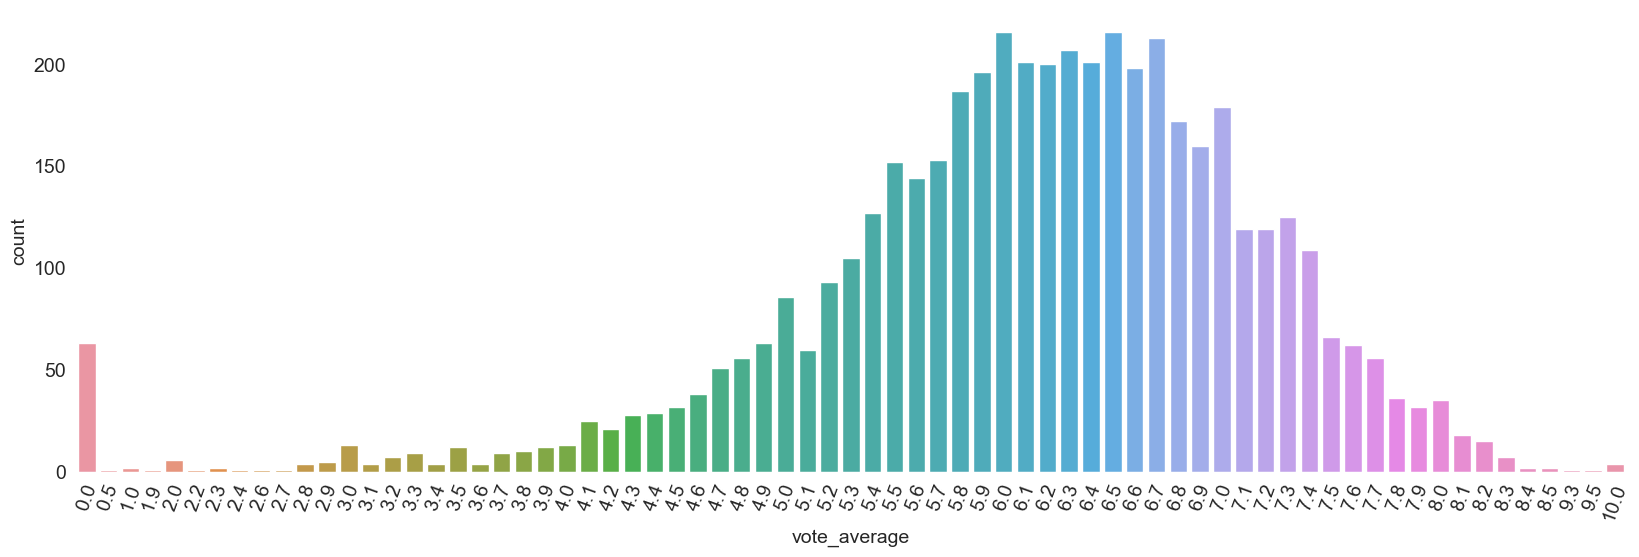

In [33]:
plt.figure(figsize=(20, 6))
sns.countplot(x = 'vote_average', data= movies_data)
plt.xticks(rotation=70)
plt.show()

Findings: From this countplot, it is evident that most votes are in the range of 5.8 to 7.0. The histplot below is another view of the countplot above. 

/Users/courtneydavid/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.



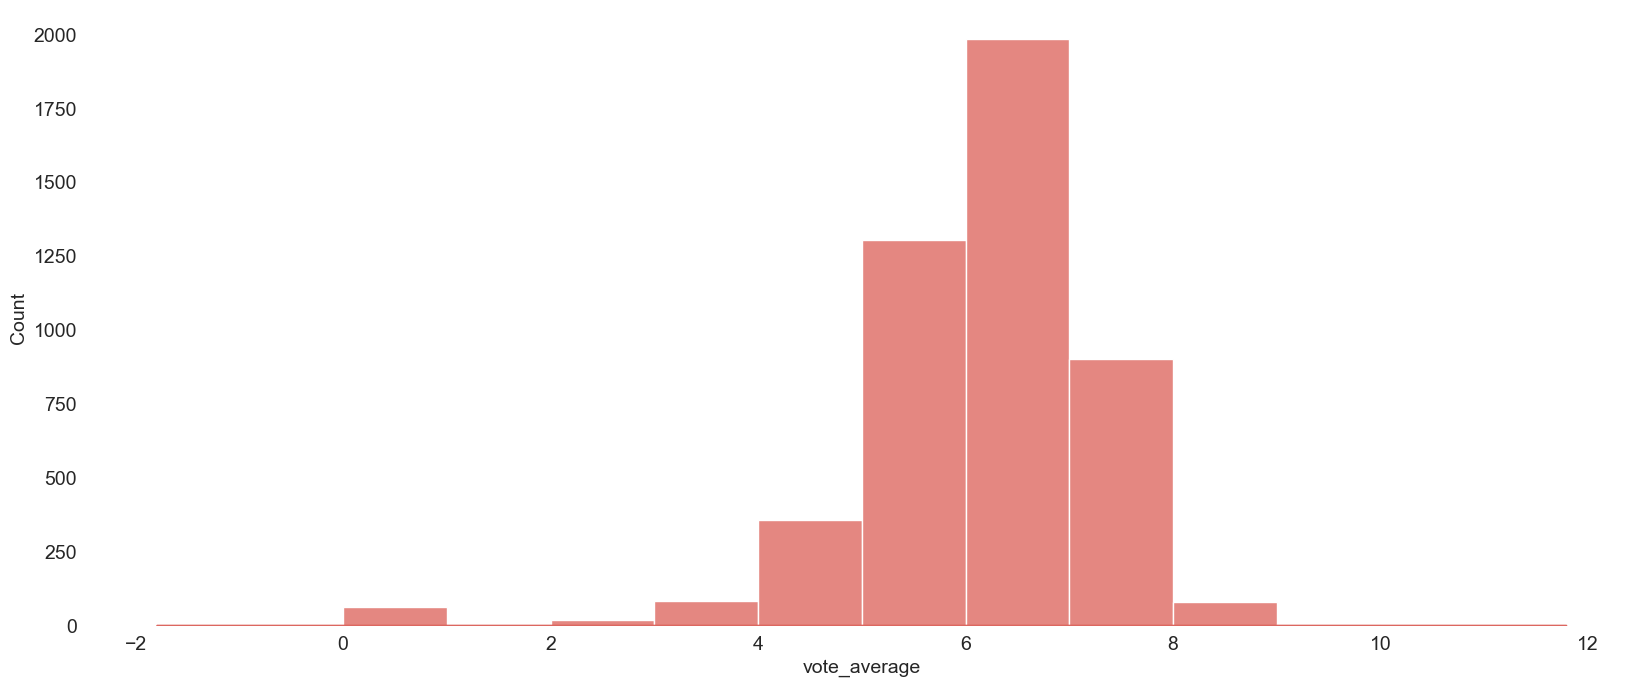

In [16]:
sns.histplot(data=movies_data, x='vote_average', binwidth=1)
sns.kdeplot(data=movies_data['vote_average'], bw=0.5)
plt.show()

I wanted to explore the data by viewing the vote average with the sum of popularity and see if there is any connection between a movie being popular and having a high or low vote average score.

<AxesSubplot:xlabel='vote_average'>

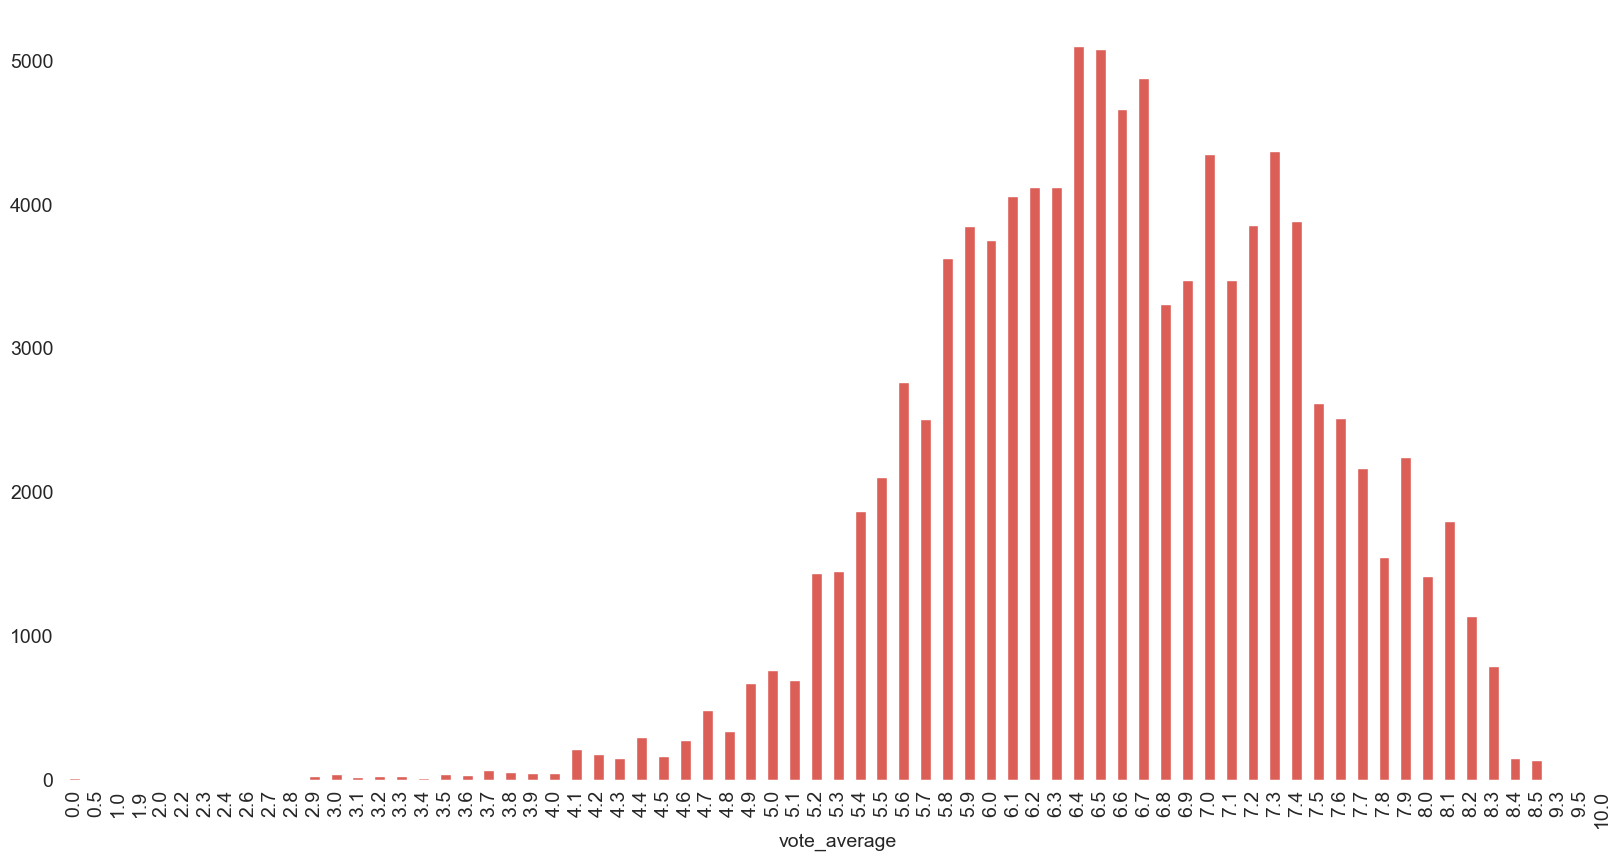

In [17]:
movies_data.groupby(['vote_average'])['popularity'].sum().plot(kind="bar",figsize=(20,10))

<AxesSubplot:xlabel='vote_average'>

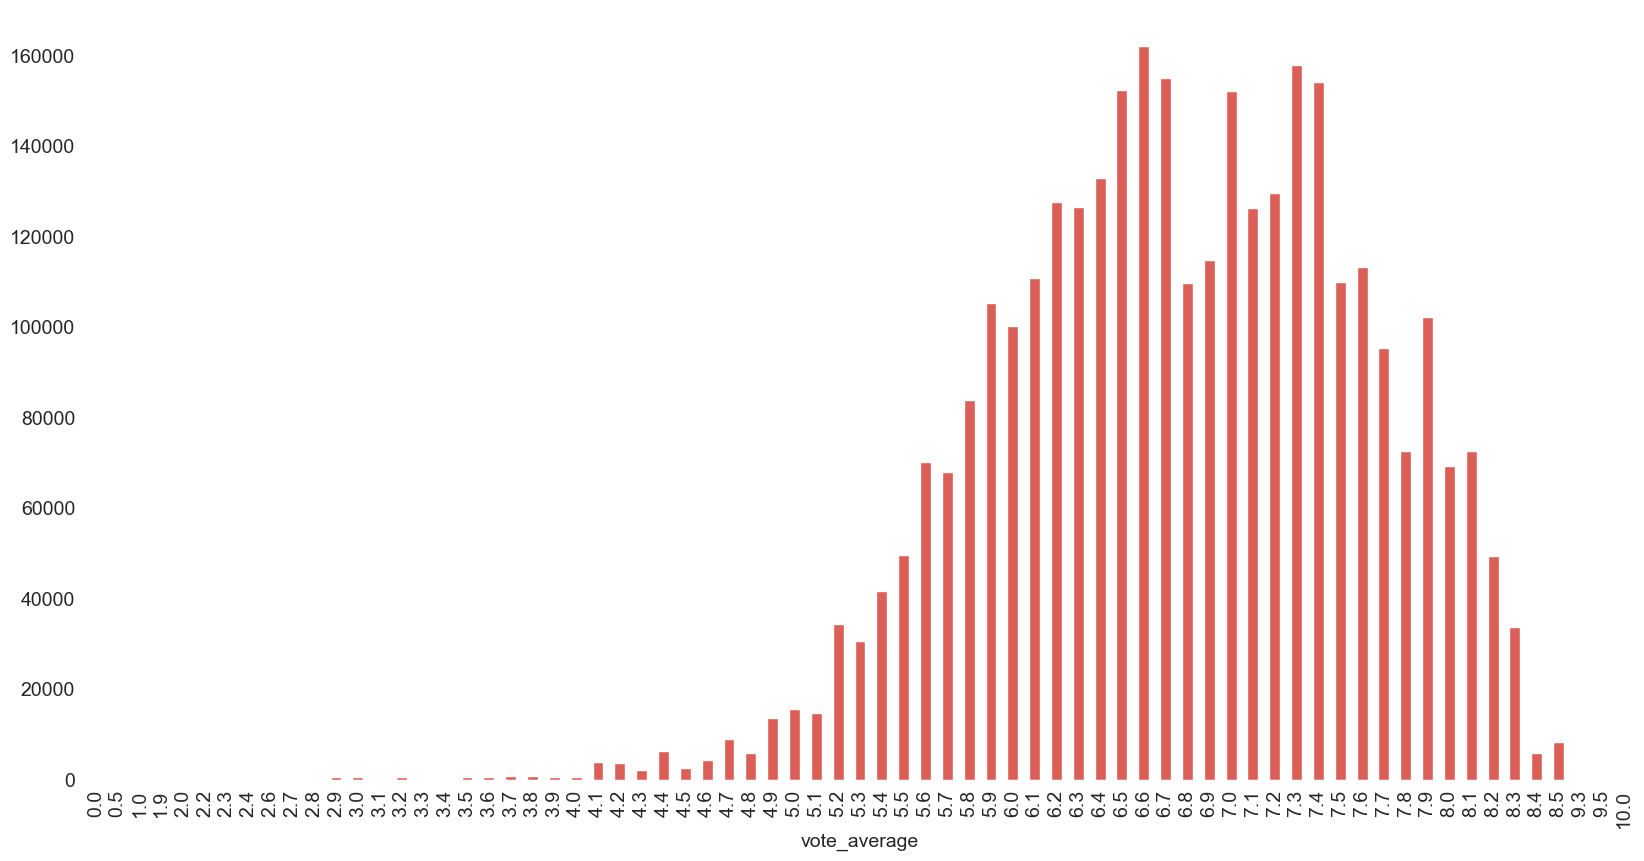

In [18]:
movies_data.groupby(['vote_average'])['vote_count'].sum().plot(kind="bar",figsize=(20,10))

Findings: From viewing the data in the bar graph, it is evident that the most popular movies have a vote average of around score 6.2 to 6.5. 

Findings: In the line plot below, it is evident that the most popular movies have the most votes even though the vote average range from 5 to 7.5. Movies that have a vote average of 9 to 10 are not as popular compared to movies with vote count in the range of 5 to 7. 

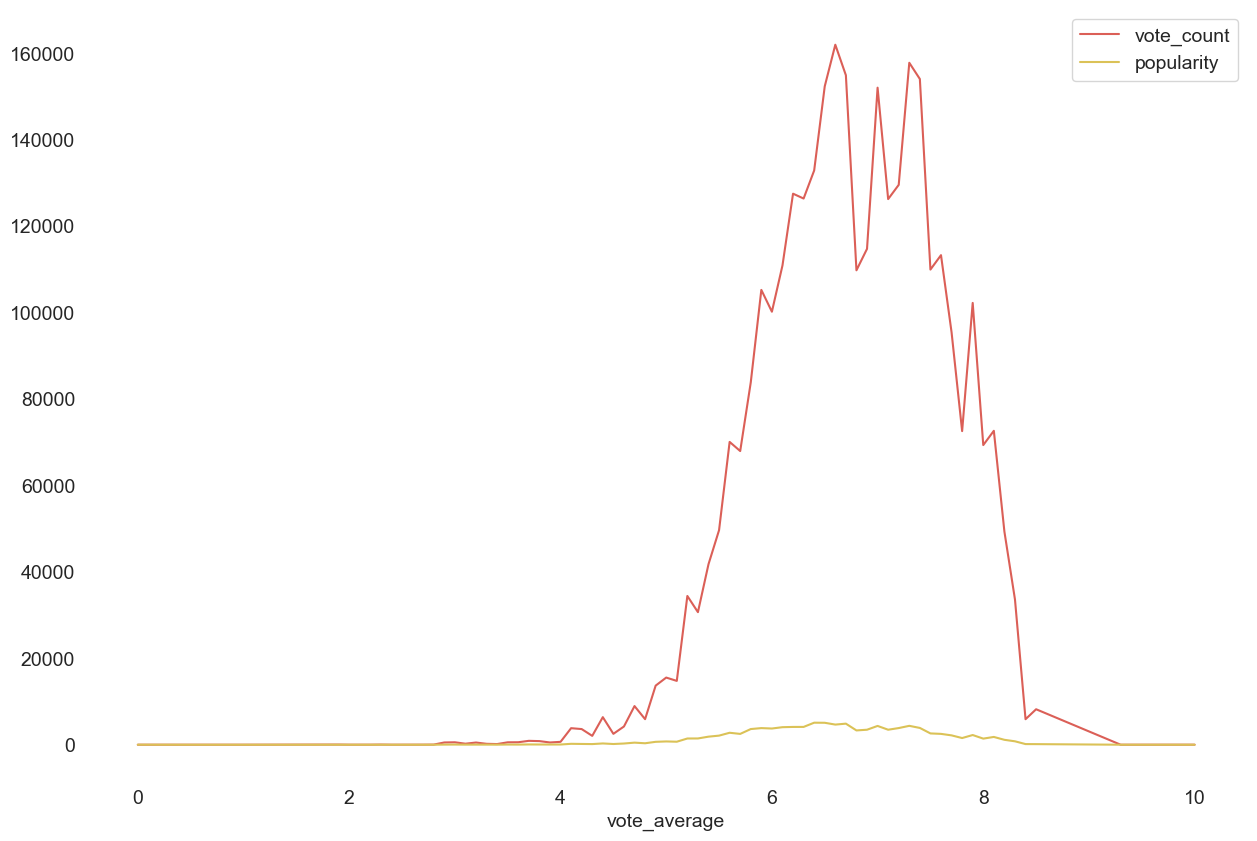

In [20]:
movies_data_grouped = movies_data.groupby('vote_average')[['vote_count','popularity']].sum()

# Create a bar graph of the grouped data
movies_data_grouped.plot(kind='line', figsize = (15,10))

# Show the graph
plt.show()

In [36]:
data = movies_data.groupby('vote_count')[['popularity']].count() 
data.sort_values('popularity', ascending= False) #sorting the values of those ratings from greatest to least
data.popularity.mode() 
data[data.popularity > 200].count() 
data.popularity.describe()

count    1609.000000
mean        2.985084
std         4.694236
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        62.000000
Name: popularity, dtype: float64

In [37]:
data.sort_values("popularity", ascending= False)

,popularity
vote_count,
0,62
1,53
2,46
4,43
3,41
...,...
1339,1
1345,1
1346,1


## Developing the features for the Recommendation System

The accuracy of predictions made by the recommendation system can be adapted using the “plot/description” of the movie. But the quality of suggestions can be further improved using the movie's metadata. Let’s say the query to our movie recommendation system is “The pirates of the Caribbean”. Then the predictions should also include movies directed by the film's director, and it should also have movies with the cast of the given query movie.
I want to utilise the following features to personalise the recommendation: cast, crew, keywords, and genres.
The movie data is in the form of lists containing strings, and I would need to convert the data into a safe and usable structure. I will apply the literal_eval() function to the features.


In [21]:
features = ["cast", "crew", "keywords", "genres"]

for feature in features:
    movies_data[feature] = movies_data[feature].apply(literal_eval)

movies_data[features].head(10)

,cast,crew,keywords,genres
0,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...","[{'id': 1463, 'name': 'culture clash'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
3,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...","[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
4,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
5,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...","[{'id': 851, 'name': 'dual identity'}, {'id': ...","[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na..."
6,"[{'cast_id': 34, 'character': 'Flynn Rider (vo...","[{'credit_id': '52fe46db9251416c91062101', 'de...","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
7,"[{'cast_id': 76, 'character': 'Tony Stark / Ir...","[{'credit_id': '55d5f7d4c3a3683e7e0016eb', 'de...","[{'id': 8828, 'name': 'marvel comic'}, {'id': ...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
8,"[{'cast_id': 3, 'character': 'Harry Potter', '...","[{'credit_id': '52fe4273c3a36847f801fab1', 'de...","[{'id': 616, 'name': 'witch'}, {'id': 2343, 'n...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
9,"[{'cast_id': 18, 'character': 'Bruce Wayne / B...","[{'credit_id': '553bf23692514135c8002886', 'de...","[{'id': 849, 'name': 'dc comics'}, {'id': 7002...","[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."


I want to extract information like the director from the movie's data because it maybe linked to customers wanting to watch a possible film with the same director. 

In [22]:
def get_director(x):
    for i in x:
        if i["job"] == "Director":
            return i["name"]
    return np.nan

In [23]:
#The get_list() returns the top 3 elements or the whole list, whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i["name"] for i in x]

        if len(names) > 3:
            names = names[:3]

        return names

    return []

I passed the crew information to the get_director() function, extracted the name, and created a new column called ‘director’.

In [24]:
#applying both the functions get_director() and get_list() to the dataset.
movies_data["director"] = movies_data["crew"].apply(get_director)

features = ["cast", "keywords", "genres"]
for feature in features:
    movies_data[feature] = movies_data[feature].apply(get_list)

In [25]:
movies_data[['title_y', 'cast', 'director', 'keywords', 'genres']].head()

,title_y,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"


I want to remove all lowercase and the spaces between them.

In [26]:
def clean_data(row):
    if isinstance(row, list):
        return [str.lower(i.replace(" ", "")) for i in row]
    else:
        if isinstance(row, str):
            return str.lower(row.replace(" ", ""))
        else:
            return ""

features = ['cast', 'keywords', 'director', 'genres']
for feature in features:
    movies_data[feature] = movies_data[feature].apply(clean_data)

Creating a soup of all the metadata information extracted to input into the vectorizer.

In [27]:
def create_soup(features):
    return ' '.join(features['keywords']) + ' ' + ' '.join(features['cast']) + ' ' + features['director'] + ' ' + ' '.join(features['genres'])


movies_data["soup"] = movies_data.apply(create_soup, axis=1)
print(movies_data["soup"].head())

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: soup, dtype: object


## Next Step

- My next steps are to continue with pre-processing 
- Further, build the recommendation system now that my data is vectorised
- Complete the recommendation system by getting recommendations.

## Summary of Data Wrangling and EDA

Recap of the problem statement: How can data from a movie-based platform recommend other movies to users based on their preferences and activities on that platform?
The dataset contains two CSV files, credits, and movies. The credits file contains all the metadata about the movie, and the movie file contains information like the name and id of the film, budget, languages in the movie that has been released, etc.
There are three types of recommendation systems.
1.	Demographic Filtering: The recommendations are the same for every user and are generalised, not personalised. These types of systems are behind sections like “Top Trending”.
2.	Content-based Filtering: These suggest recommendations based on the item metadata (movie, product, song, etc.). Here, the main idea is that if a user likes an item, they will also like items like it.
3.	Collaboration-based Filtering: These systems make recommendations by grouping users with similar interests. For this system, metadata of the item is not required.
In this project, I will build a Content-based recommendation engine for movies.

I merged the two CSV files, and the dataset is now called movies_data. The accuracy of predictions made by the recommendation system can be adapted using the “plot/description” of the movie. But the quality of suggestions can be further improved using the movie's metadata. Let’s say the query to our movie recommendation system is “The pirates of the Caribbean”. Then the predictions should also include movies directed by the film's director, and it should also have movies with the cast of the given query movie.
I want to utilise the following features to personalise the recommendation: cast, crew, keywords, and genres.
